In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/tmp/"
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_005_0320_tanh_hidden/" # tanh for hidden
results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_0001_0320_relu_hidden/" # relu for hidden

In [3]:
def plot_hist_output(epoch):
    vals = np.load(results_dir + "epoch_{}_outputs_noise.npy".format(epoch))
    print(vals.shape, vals.mean())
    plt.figure()
    plt.hist(vals, range=[-2.,2.], bins=150)
    plt.grid(True)
    
def plot_hist_hidden(epoch):
    vals = np.load(results_dir + "epoch_{}_h1_noise.npy".format(epoch))
    print(vals.shape, vals.mean())
    plt.figure()
    plt.hist(vals, range=[-2.,2.], bins=150)
    plt.grid(True)

def plot_hist_over_epochs(epochs):
    num_bins = 100
    for epoch in epochs:
        vals = np.load(results_dir + "epoch_{}_outputs_noise.npy".format(epoch))
        hist, _ = np.histogram(vals, range=[-2.,2.], bins=num_bins)
        xmin = np.min(vals)
        xmax = np.max(vals)
        x = np.linspace(xmin, xmax, num_bins)
        plt.plot(x, hist, label="Epoch {}".format(epoch))
        plt.xlim(-2.,2.)
        plt.legend()
    plt.grid(True)

def plot_hist_top_view_hidden(num_epochs):
    num_bins = 100
    points = 1000
    plt.figure(figsize=(10,5))
    for epoch in range(num_epochs):
        vals = np.load(results_dir + "epoch_{}_h1_noise.npy".format(epoch+1))
        hist, bins = np.histogram(vals, range=[-1.5,8.], bins=num_bins)
#         hist, bins = np.histogram(vals, range=[-2.,2.], bins=num_bins)
        total_points = np.sum(hist)
#         assert total_points == points, "Error:{}".format(total_points)
        
        i = 0
        colours = list()
        for b in range(bins.shape[0]-1):
            c = plt.cm.jet(hist[i]/float(total_points)*30)
            colours.append(c)
            i += 1
            
        epoch_vals = np.tile(epoch, bins[:num_bins].shape)
        plt.scatter(epoch_vals, bins[:num_bins], color=colours)
    plt.xlabel("Epoch")
    plt.show()

def plot_hist_top_view_output(num_epochs):
    num_bins = 100
    points = 1000
    plt.figure(figsize=(10,5))
    for epoch in range(num_epochs):
        vals = np.load(results_dir + "epoch_{}_outputs_noise.npy".format(epoch+1))
        hist, bins = np.histogram(vals, range=[-2.,2.], bins=num_bins)
        total_points = np.sum(hist)
#         assert total_points == points, "Error:{}".format(total_points)
        
        i = 0
        colours = list()
        for b in range(bins.shape[0]-1):
            c = plt.cm.jet(hist[i]/float(total_points)*30)
            colours.append(c)
            i += 1
            
        epoch_vals = np.tile(epoch, bins[:num_bins].shape)
        plt.scatter(epoch_vals, bins[:num_bins], color=colours)
    plt.xlabel("Epoch")
    plt.show()

def plot_acc():
    vals = np.load(results_dir + "accuracies.npy")
    plt.figure(figsize=(10,5))
    plt.plot(vals)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
    
def plot_mutual_info():
    vals1 = np.load(results_dir + "mutual_information_layer1.npy")
    vals2 = np.load(results_dir + "mutual_information_layer2.npy")
    plt.figure(figsize=(10,5))
    plt.plot(vals1, label="Layer 1")
    plt.plot(vals2, label="Layer 2")
    plt.ylabel("Mutual Information")
    plt.xlabel("Epoch")
    plt.legend()
    plt.grid(True)

((1000, 1), 0.0013921421)


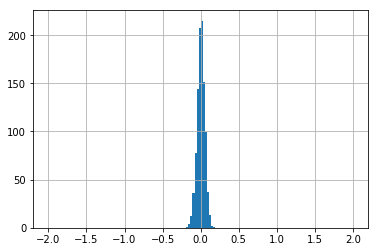

In [4]:
plot_hist_output(1)

((1000, 1), -0.37288097)


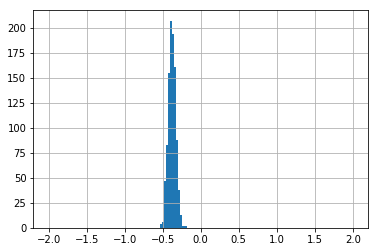

In [5]:
plot_hist_output(15)

((1000, 1), 0.047281247)


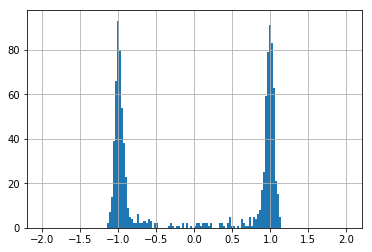

In [6]:
plot_hist_output(250)

((1000, 1), 0.0003138978)


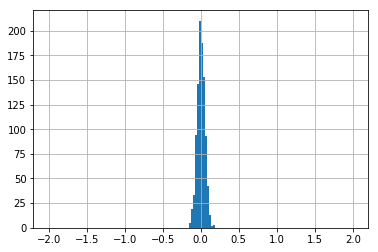

In [7]:
plot_hist_hidden(1)

((1000, 1), 0.008912435)


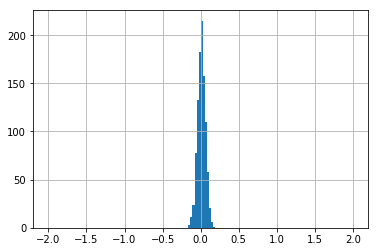

In [8]:
plot_hist_hidden(15)

((1000, 1), 1.1167153)


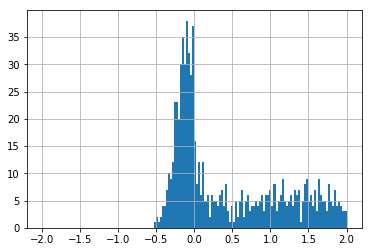

In [9]:
plot_hist_hidden(250)

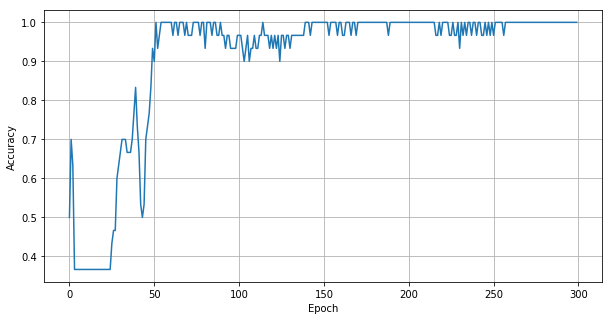

In [10]:
plot_acc()

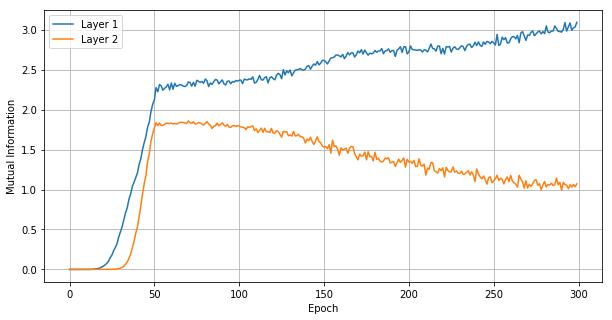

In [11]:
plot_mutual_info()

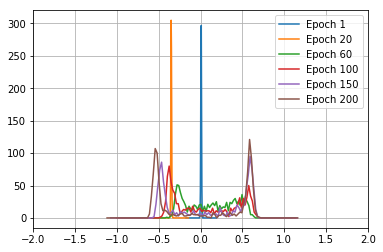

In [12]:
plot_hist_over_epochs([1,20,60,100,150,200])

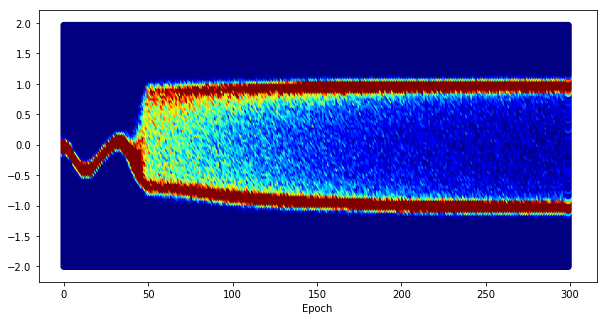

In [13]:
plot_hist_top_view_output(300)

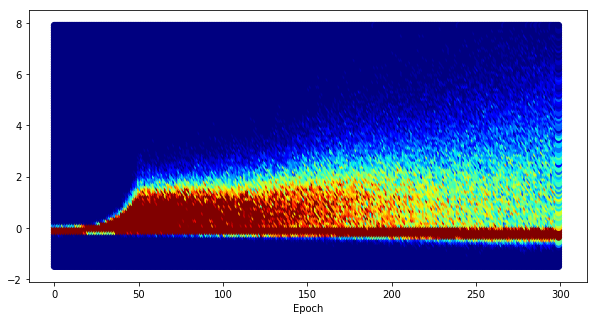

In [14]:
plot_hist_top_view_hidden(300)